## Example Usage for SurFF

------------------------------------------

PLease install the required packages and download neccessary data files before running the code below.



# Preparation
First, download the `SurFF_CoreDataFiles.zip`,
```bash
unzip SurFF_CoreDataFiles.zip
```
The structure of `SurFF_CoreDataFiles` is:

```
SurFF_CoreDataFiles/
├── Data/
│   ├── example/                # Original data folder
│   │   ├── bulks/              # Crystal file
│   │   ├── crystal_structures/ # POSCAR file
│   │   ├── slabs/              # Surface file
│   │   └── lmdb/               
│   │       └── relax_example.sh # Bash file to run the relaxation
├── ocp/                        
│   ├── checkpoints/            # MLFF model weights
│   └── data/
│   │   └── example/            # Store the lmdb file
│   └── traj/                   
│       └── example/            # Store the traj file
└── results/                    
    ├── example/                # Save final result
    └── run_wulff.py            # Wulff construction
```

In [3]:
! unzip SurFF_CoreDataFiles.zip

! mkdir Data/example/
! mkdir ocp/data/
! mkdir ocp/traj/
! mkdir ocp/data/example/
! mkdir ocp/traj/example/
! mkdir results
! mkdir results/example/


! mv SurFF_CoreDataFiles/Data/example/crystal_structures/ Data/example/
! mv SurFF_CoreDataFiles/Data/example/lmdb/ Data/example/
! mv SurFF_CoreDataFiles/ocp/checkpoints/ ocp/
! mv SurFF_CoreDataFiles/results/run_wulff.py results/

Archive:  SurFF_CoreDataFiles.zip
   creating: SurFF_CoreDataFiles/
   creating: SurFF_CoreDataFiles/Data/
   creating: SurFF_CoreDataFiles/Data/example/
   creating: SurFF_CoreDataFiles/Data/example/bulks/
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_0  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_1  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_2  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_3  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_4  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_5  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_0  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_1  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_10  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_11  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_12  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_13  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_2  
  inflati

## Surface Structure Generation

---------


We prepare the structures of crystals to be predicted.
Here we have 5 crystal structures in POSCAR format in the folder below:

`Data/example/crystal_structures/`


In [4]:
# get all files in the folder
import os

folder = r'Data/example/crystal_structures'
files = os.listdir(folder)
print(files)

['104', '102', '101', '103', '105']


View the structure of crystal, if the server does not support gui, you can download the POSCAR file and view on your laptop

In [5]:
# Let first visualize the one structure using `ase` package
from ase.io import read

structure = read(os.path.join(folder, files[0]), format='vasp')

print(structure)

# plot the structure
from ase.visualize import view

view(structure)

Atoms(symbols='TiAl', pbc=True, cell=[[2.8226229900771087, 0.0, 2e-16], [5e-16, 2.8226229900771087, 2e-16], [0.0, 0.0, 4.072707671434573]])


<Popen: returncode: None args: ['/home/liwentao/miniconda3/envs/surff/bin/py...>

usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...


In [6]:
import pandas as pd
# We then generate the required unique surface structures of the crystals.
from functionals.gen_bulk_slab import process_structure_sep

slab_dir = r"Data/example/slabs" # the folder to save the surface slab structures
bulk_dir = r"Data/example/bulks" # the folder to save the corresponding OUC bulk structures (not used in this tutorial)

info = []
for poscar in files:
    slab_info = process_structure_sep(crystal_id=int(poscar), # a unique id for each crystal
                          slab_dir=slab_dir, 
                          bulk_dir=bulk_dir, 
                          source_dir=folder) # the folder where the crystal structures are stored
    info.extend(slab_info)


# check the generated surface structures
info = df = pd.DataFrame(info, columns=['slab_id', 'formula', 'miller_index', 'shift', 'num_atom'])
print(info)

/home/liwentao/miniconda3/envs/surff/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/liwentao/miniconda3/envs/surff/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/liwentao/miniconda3/envs/surff/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/liwentao/miniconda3/envs/surff/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


   slab_id  formula miller_index     shift  num_atom
0    104_0  Ti1 Al1          111  0.250000        12
1    104_1  Ti1 Al1          110  0.500000        12
2    104_2  Ti1 Al1          101  0.500000        10
3    104_3  Ti1 Al1          100  0.250000         8
4    104_4  Ti1 Al1          001  0.250000         6
5    104_5  Ti1 Al1          221  0.125000        24
6    104_6  Ti1 Al1          212  0.125000        20
7    104_7  Ti1 Al1          211  0.250000        40
8    104_8  Ti1 Al1          210  0.125000        16
9    104_9  Ti1 Al1          201  0.125000        16
10  104_10  Ti1 Al1          112  0.250000        16
11  104_11  Ti1 Al1          102  0.125000        16
12   102_0  Zr6 Pb2          111  0.125000        32
13   102_1  Zr6 Pb2          110  0.250000        32
14   102_2  Zr6 Pb2          101  0.125000        24
15   102_3  Zr6 Pb2          101  0.375000        24
16   102_4  Zr6 Pb2          100  0.250000        24
17   102_5  Zr6 Pb2          001  0.125000    

In [7]:
# Let us check the generated surface structures
slab_files = os.listdir(slab_dir)
print(slab_files)


['103_5', '101_4', '105_3', '104_8', '102_0', '105_4', '105_11', '104_0', '105_2', '105_7', '105_13', '103_3', '105_12', '105_20', '103_6', '102_6', '101_1', '102_13', '101_2', '104_10', '104_7', '101_0', '103_1', '104_6', '102_1', '102_2', '101_3', '102_7', '105_8', '102_11', '102_3', '105_0', '102_12', '102_9', '105_1', '104_1', '104_4', '103_0', '102_10', '104_11', '105_17', '105_10', '105_6', '105_15', '104_3', '102_4', '102_5', '101_5', '104_2', '104_9', '105_9', '103_4', '105_16', '104_5', '103_2', '102_8', '105_19', '105_5', '105_18', '105_14']


In [8]:
# Let first visualize the one structure using `ase` package
structure = read(os.path.join(slab_dir, slab_files[0]), format='vasp')
print(structure)

view(structure)

Atoms(symbols='Au32In64', pbc=True, cell=[[13.439773406766799, 0.0, -6.719886703383399], [5.1e-15, 13.439773406766799, -6.719886703383399], [0.0, 0.0, 33.599433516916996]], constraint=FixAtoms(indices=[4, 5, 14, 15, 16, 17, 26, 27, 32, 33, 38, 39, 50, 51, 58, 59, 68, 69, 76, 77, 90, 91, 94, 95]))


<Popen: returncode: None args: ['/home/liwentao/miniconda3/envs/surff/bin/py...>

usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...


## Surface Relaxation

-------------

We then predict the surface energies of the generated surface structures by relaxing the structures using a MLFF model.

In [9]:
# We first compile all the surface structures into a single lmdb file
from functionals.gen_lmdb_relaxation import gen_lmdb

# prepare a list of slabs info
dataset = [{'slab_id': files, "POSCAR_pth": os.path.join(slab_dir, files)} for files in slab_files]

gen_lmdb(dataset=dataset, 
         DB_path= r"ocp/data/example/surface_relaxation.lmdb", # the path to save the lmdb file
         )

100%|██████████| 60/60 [00:00<00:00, 611.08it/s]

save to ocp/data/example/surface_relaxation.lmdb


In [10]:
# We then relax the surface structures using the MLFF model

# change the working directory to the root folder of the MLFF
os.chdir(r"ocp")


If you have gpu, change the `--cpu` to `--local_rank ${id}` in relax_example.sh

In [12]:
!bash ../Data/example/lmdb/relax_example.sh

2024-07-15 11:32:50 (INFO): Project root: /ssd/liwentao/SurFF/ocp
2024-07-15 11:33:16 (INFO): amp: false
cmd:
  checkpoint_dir: ./checkpoints/2024-07-15-11-33-20
  commit: 064e399
  identifier: ''
  logs_dir: ./logs/tensorboard/2024-07-15-11-33-20
  print_every: 10
  results_dir: ./results/2024-07-15-11-33-20
  seed: 0
  timestamp_id: 2024-07-15-11-33-20
dataset:
  grad_target_mean: 0.0
  grad_target_std: 1
  normalize_labels: false
  src: data/example
  target_mean: 0
  target_std: 1
gpus: 1
logger: tensorboard
model: equiformer_v2
model_attributes:
  alpha_drop: 0.1
  attn_activation: silu
  attn_alpha_channels: 64
  attn_hidden_channels: 64
  attn_value_channels: 16
  distance_function: gaussian
  drop_path_rate: 0.0
  edge_channels: 128
  ffn_activation: silu
  ffn_hidden_channels: 128
  grid_resolution: 18
  lmax_list:
  - 4
  max_neighbors: 20
  max_num_elements: 90
  max_radius: 6.0
  mmax_list:
  - 2
  norm_type: layer_norm_sh
  num_distance_basis: 512
  num_heads: 8
  num_laye

In [13]:
os.chdir(r"../")
# The relaxation resutls would be stored in the folder below
traj_folder= r"ocp/traj/example"

trajs = os.listdir(traj_folder)
print(trajs)


['105_16.traj', '104_2.traj', '102_13.traj', '104_8.traj', '102_5.traj', '104_3.traj', '102_9.traj', '102_0.traj', '102_2.traj', '102_12.traj', '101_2.traj', '101_3.traj', '102_1.traj', '105_4.traj', '105_10.traj', '104_4.traj', '105_14.traj', '104_11.traj', '101_5.traj', '104_5.traj', '105_0.traj', '105_7.traj', '104_10.traj', '103_0.traj', '102_4.traj', '105_20.traj', '105_5.traj', '102_11.traj', '103_1.traj', '105_3.traj', '105_18.traj', '105_2.traj', '101_1.traj', '102_7.traj', '103_2.traj', '105_13.traj', '105_11.traj', '105_17.traj', '105_6.traj', '102_6.traj', '104_7.traj', '104_0.traj', '105_1.traj', '102_8.traj', '105_15.traj', '104_9.traj', '101_0.traj', '105_9.traj', '103_4.traj', '101_4.traj', '103_3.traj', '105_12.traj', '102_10.traj', '104_6.traj', '103_5.traj', '102_3.traj', '105_8.traj', '104_1.traj', '103_6.traj', '105_19.traj']


In [14]:
# let us visualize the one relaxation trajectory
from ase.io import read
from ase.visualize import view

traj = read(os.path.join(traj_folder, trajs[0]), format='traj', index=':')
view(traj)

print(traj[0])

Atoms(symbols='Ti8Zn4Ti8Zn4Ti8Zn4Ti8Zn4', pbc=True, cell=[[3.030179977416992, 0.0, 2.000000033724767e-16], [-1.3000000153036537e-15, 21.378442764282227, -3.030179977416992], [0.0, 0.0, 27.27161979675293]], tags=..., constraint=FixAtoms(indices=[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]), calculator=SinglePointCalculator(...))


usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...


## Surface Exposure

------------------


In [15]:
from results.run_wulff import run_wulff
import pandas as pd
predict_dir = r"ocp/traj/example"

run_wulff(predict_dir, info=info,
              crystal_dir=folder,
              save_dir=r"results/example")

predict_traj_dir: ocp/traj/example
info:    slab_id  formula miller_index     shift  num_atom
0    104_0  Ti1 Al1          111  0.250000        12
1    104_1  Ti1 Al1          110  0.500000        12
2    104_2  Ti1 Al1          101  0.500000        10
3    104_3  Ti1 Al1          100  0.250000         8
4    104_4  Ti1 Al1          001  0.250000         6
5    104_5  Ti1 Al1          221  0.125000        24
6    104_6  Ti1 Al1          212  0.125000        20
7    104_7  Ti1 Al1          211  0.250000        40
8    104_8  Ti1 Al1          210  0.125000        16
9    104_9  Ti1 Al1          201  0.125000        16
10  104_10  Ti1 Al1          112  0.250000        16
11  104_11  Ti1 Al1          102  0.125000        16
12   102_0  Zr6 Pb2          111  0.125000        32
13   102_1  Zr6 Pb2          110  0.250000        32
14   102_2  Zr6 Pb2          101  0.125000        24
15   102_3  Zr6 Pb2          101  0.375000        24
16   102_4  Zr6 Pb2          100  0.250000        24
17   

100%|██████████| 60/60 [00:00<00:00, 1251.56it/s]


total 5 crystals, 60 slabs, start Wulff analysis


100%|██████████| 5/5 [00:00<00:00, 17.39it/s]


Save results to results/example/wulff_results.pkl
Save wulff results to results/example/wulff_results.csv
Start save wulff shape to results/example/wulff_shape


  0%|          | 0/5 [00:00<?, ?it/s]/home/liwentao/miniconda3/envs/surff/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
 20%|██        | 1/5 [00:00<00:00,  5.68it/s]/home/liwentao/miniconda3/envs/surff/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

save wulff shape to results/example/wulff_shape
Complete!


In [16]:
# let view the predicted results
results_csv = r"results/example/wulff_results.csv"
results = pd.read_csv(results_csv)
print(results)

    crystal_id slab_id     miller    shift  surface_energy_pred  area_pred
0          102  102_13  (1, 0, 2)  0.25000              0.09168    0.00000
1          102   102_5  (0, 0, 1)  0.12500              0.08475    0.08248
2          102   102_9  (2, 1, 1)  0.18750              0.09167    0.00000
3          102   102_0  (1, 1, 1)  0.12500              0.08538    0.00000
4          102   102_2  (1, 0, 1)  0.12500              0.09124    0.00102
5          102  102_12  (1, 1, 2)  0.50000              0.07179    0.77370
6          102   102_1  (1, 1, 0)  0.25000              0.09088    0.00000
7          102   102_4  (1, 0, 0)  0.25000              0.08195    0.14280
8          102  102_11  (2, 0, 1)  0.06250              0.09129    0.00000
9          102   102_7  (2, 1, 2)  0.12500              0.08620    0.00000
10         102   102_6  (2, 2, 1)  0.06250              0.08863    0.00000
11         102   102_8  (2, 1, 1)  0.06250              0.09169    0.00000
12         102  102_10  (

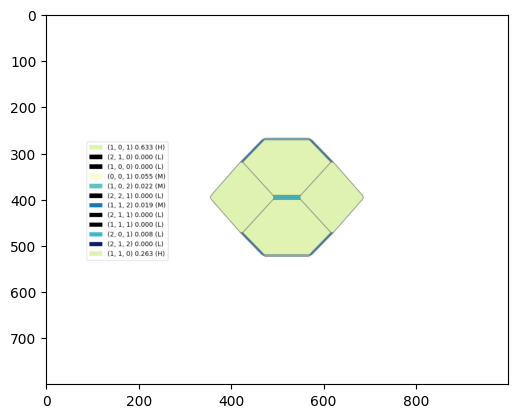

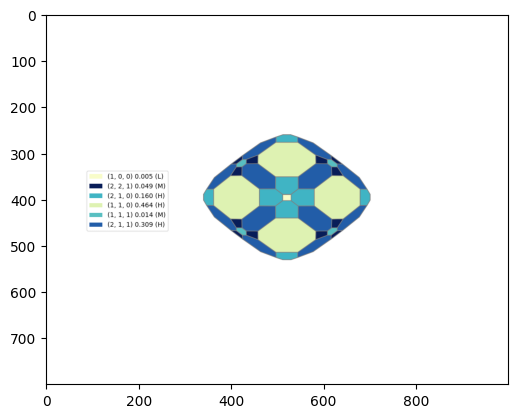

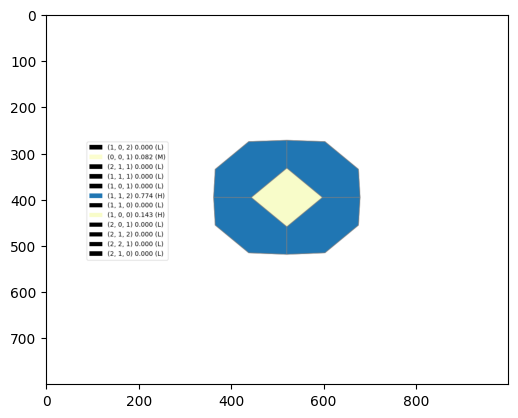

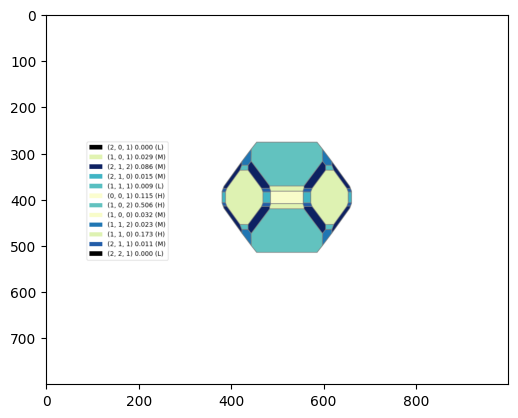

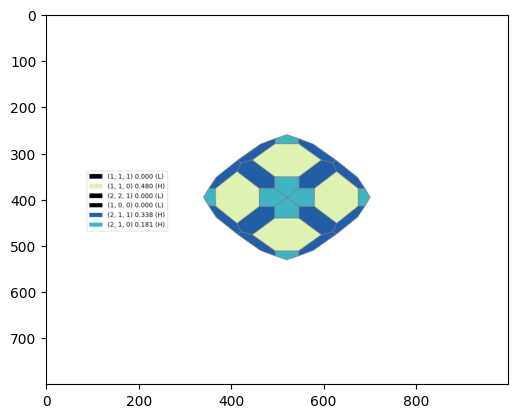

In [17]:
# let view the predicted shape and surface exposure
image_dir = r"results/example/wulff_shape"
images = os.listdir(image_dir)

# plot the .png image
import matplotlib.pyplot as plt

for image in images:
    img = plt.imread(os.path.join(image_dir, image))
    plt.imshow(img)
    plt.show()